In [1]:
import numpy as np
import xarray as xr
from glob import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import ecco_v4_py as ecco

picking up NetCDF formatted monthly data

In [2]:
dataDir = f'/scratch2/shared/ecco/v4r4'

In [3]:
%%time
ds = xr.open_mfdataset(glob(f'{dataDir}/nctiles_monthly/THETA/2015/*.nc'))

CPU times: user 654 ms, sys: 104 ms, total: 757 ms
Wall time: 1.68 s


Load GRID file

In [4]:
dgrid = xr.open_dataset(f'{dataDir}/nctiles_grid/ECCO-GRID.nc')
dgrid

<xarray.Dataset>
Dimensions:  (k_p1: 51, j_g: 90, i_g: 90, k: 50, j: 90, k_u: 50, i: 90,
              k_l: 50, tile: 13)
Coordinates: (12/38)
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...       ...
    hFacS    (k, tile, j_g, i) float32 ...
    hFacC    (k, tile, j, i) float32 ...
    hFacW    (k, tile, j, i_g) float32 ...
    maskW    (k, tile, j, i_g) bool ...
    maskC    (k, tile, j, i) bool ...
    maskS    (k, tile, j_g, i) bool ...
Data variables:
    *empty*
Attributes:
    date_created:  Mon Dec 30 11:13:26 2019
    title:         ECCOv4 MITgcm grid information

In [5]:
dgrid.load()
ds = ds.merge(dgrid)
sst = ds.THETA.isel(k=0).mean('time')

## Blank ortho projection

Plot on lat lon projection, easy thanks to ECCO-v4_py. Orthographic projections. 

/home/ivana/ECCOv4-py/ecco_v4_py/plot_utils.py:38: RuntimeWarning: All-NaN axis encountered
  cmin = np.nanmin(fld)
/home/ivana/ECCOv4-py/ecco_v4_py/plot_utils.py:39: RuntimeWarning: All-NaN axis encountered
  cmax = np.nanmax(fld)
/home/ivana/ECCOv4-py/ecco_v4_py/tile_plot_proj.py:177: RuntimeWarning: All-NaN axis encountered
  cmin = np.nanmin(data[:])
/home/ivana/ECCOv4-py/ecco_v4_py/tile_plot_proj.py:179: RuntimeWarning: All-NaN axis encountered
  cmax = np.nanmax(data[:])


-179.875 149.875
-180.0 150.0
-89.875 89.875
-90.0 90.0
150.12606037815127 179.87394962184874
150.00001 180.0
-89.875 89.875
-90.0 90.0


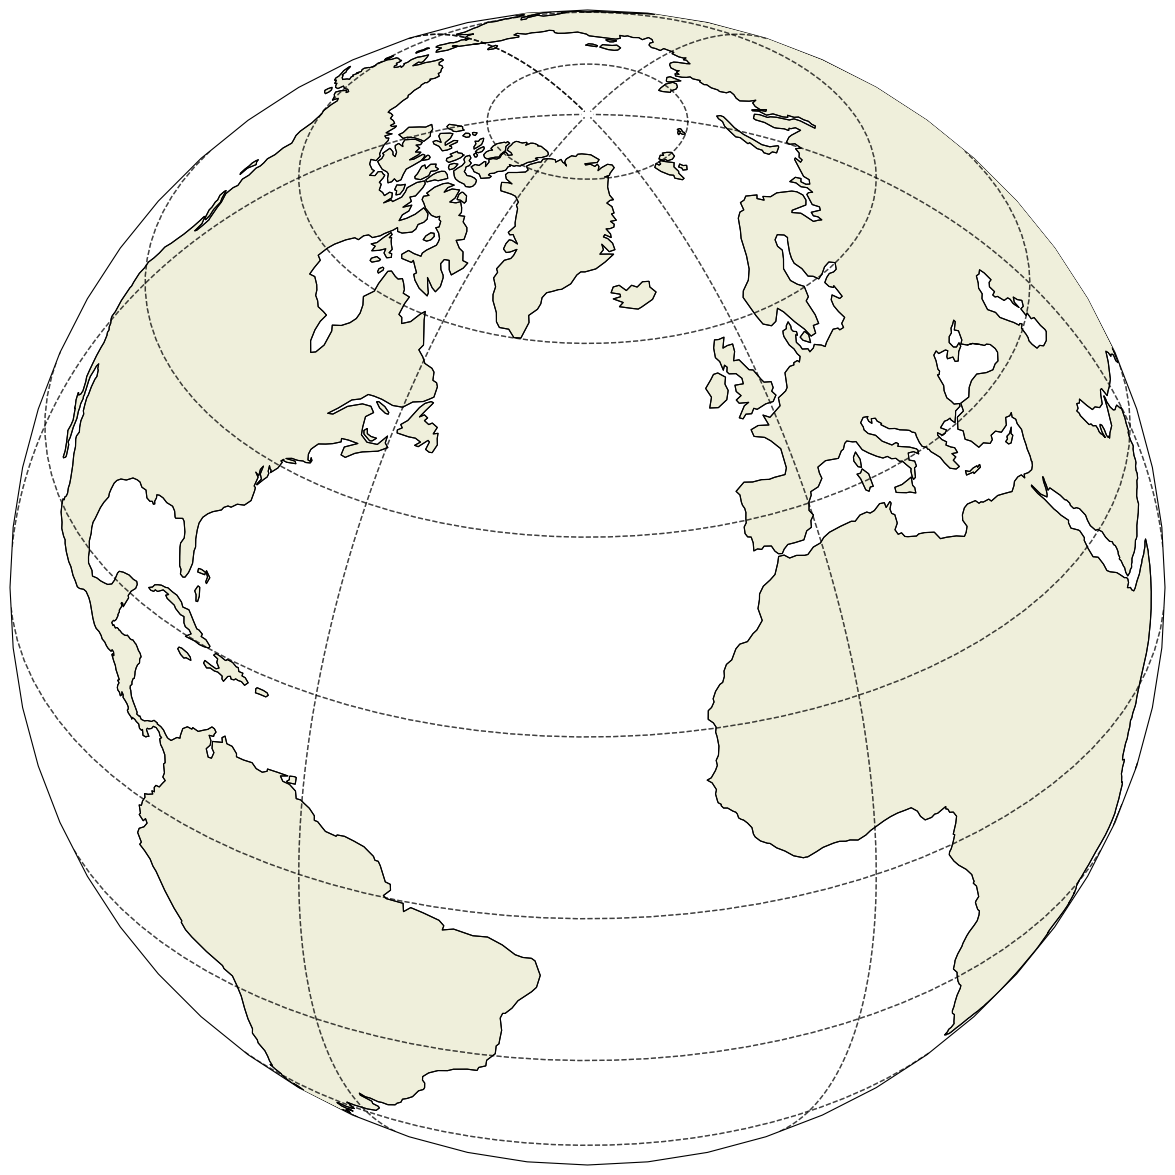

In [10]:
plt.rcParams.update({'figure.figsize':(15,15)})
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sst*np.nan,
                              projection_type='ortho',
                              user_lon_0=-30,
                              user_lat_0=35 );
plt.savefig('../img/blank-ortho-world.png', transparent=True, bbox_inches='tight')

/home/ivana/ECCOv4-py/ecco_v4_py/plot_utils.py:38: RuntimeWarning: All-NaN axis encountered
  cmin = np.nanmin(fld)
/home/ivana/ECCOv4-py/ecco_v4_py/plot_utils.py:39: RuntimeWarning: All-NaN axis encountered
  cmax = np.nanmax(fld)
/home/ivana/ECCOv4-py/ecco_v4_py/tile_plot_proj.py:177: RuntimeWarning: All-NaN axis encountered
  cmin = np.nanmin(data[:])
/home/ivana/ECCOv4-py/ecco_v4_py/tile_plot_proj.py:179: RuntimeWarning: All-NaN axis encountered
  cmax = np.nanmax(data[:])


-179.875 149.875
-180.0 150.0
-89.875 89.875
-90.0 90.0
150.12606037815127 179.87394962184874
150.00001 180.0
-89.875 89.875
-90.0 90.0


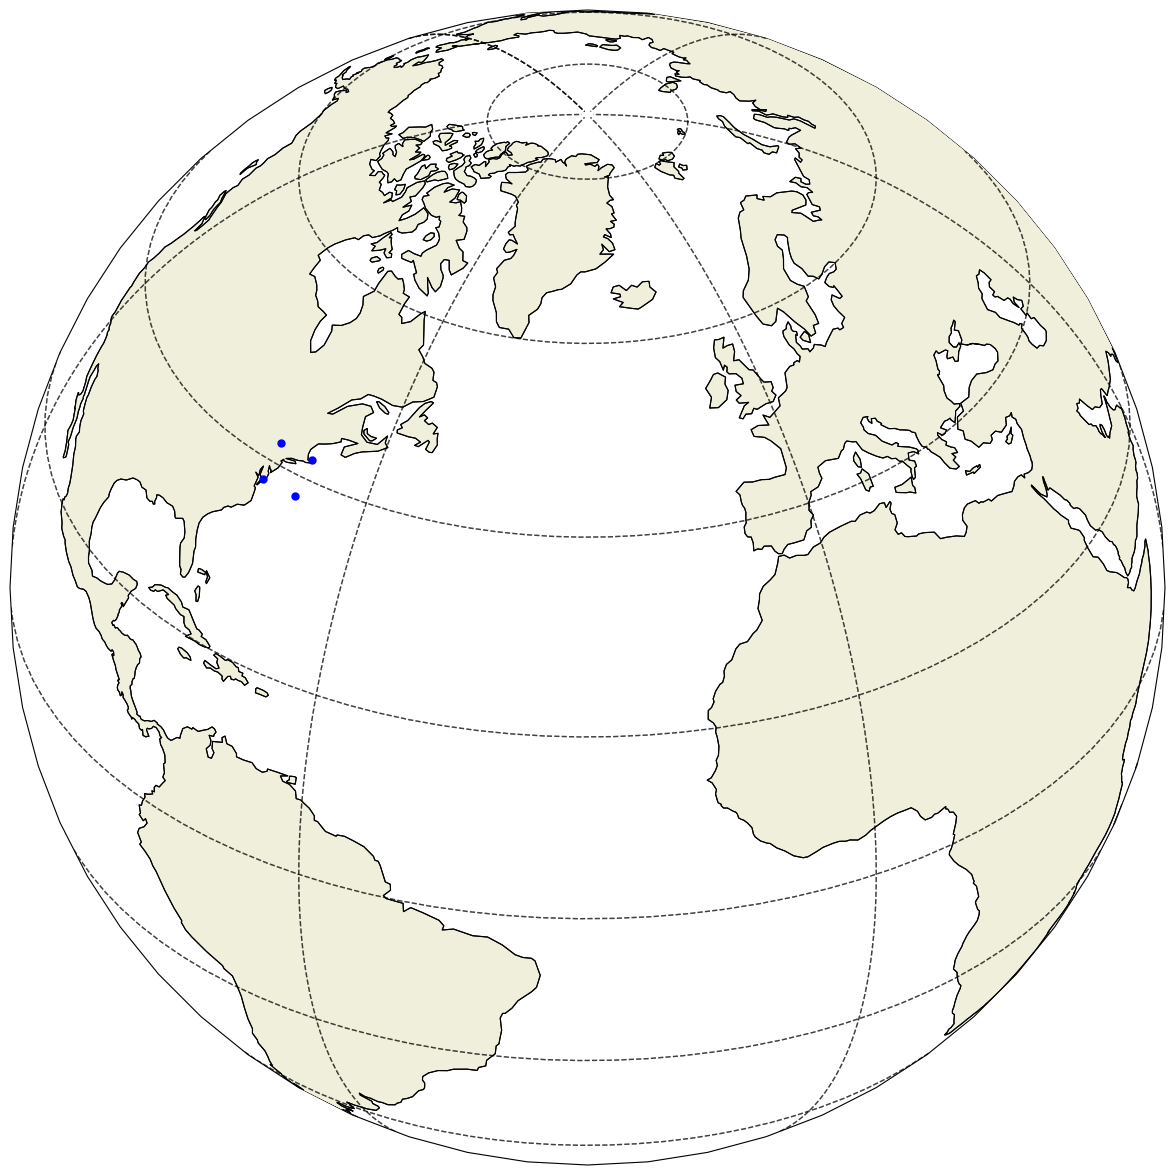

In [19]:
ortho=ccrs.Orthographic(central_longitude=-30,central_latitude=35)
geo = ccrs.Geodetic()

plt.rcParams.update({'figure.figsize':(15,15)})
ax = plt.axes(projection=ortho)

# transform lat/lons points to othographic points
points = ortho.transform_points(geo, np.array([-75.5,-75.5,-70,-70]), np.array([42,38,42,38]))

ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sst*np.nan,
                              projection_type='ortho',
                              user_lon_0=-30,
                              user_lat_0=35 );
# plot native orthographic points                                                                                
ax.plot(points[:, 0], points[:, 1], 'b.', markersize=10, zorder=99)

plt.savefig('../img/blank-ortho-world_dots.png', transparent=True, bbox_inches='tight')

# Plot Plate Carree projection of region

Now try to plot over a subset given by \[ -75.5 -70 \]deg E \[ 38 42\]deg N

/home/ivana/ECCOv4-py/ecco_v4_py/plot_utils.py:38: RuntimeWarning: All-NaN axis encountered
  cmin = np.nanmin(fld)
/home/ivana/ECCOv4-py/ecco_v4_py/plot_utils.py:39: RuntimeWarning: All-NaN axis encountered
  cmax = np.nanmax(fld)
/home/ivana/ECCOv4-py/ecco_v4_py/tile_plot_proj.py:177: RuntimeWarning: All-NaN axis encountered
  cmin = np.nanmin(data[:])
/home/ivana/ECCOv4-py/ecco_v4_py/tile_plot_proj.py:179: RuntimeWarning: All-NaN axis encountered
  cmax = np.nanmax(data[:])


-179.875 179.875
-180.0 180.0
-89.875 89.875
-90.0 90.0


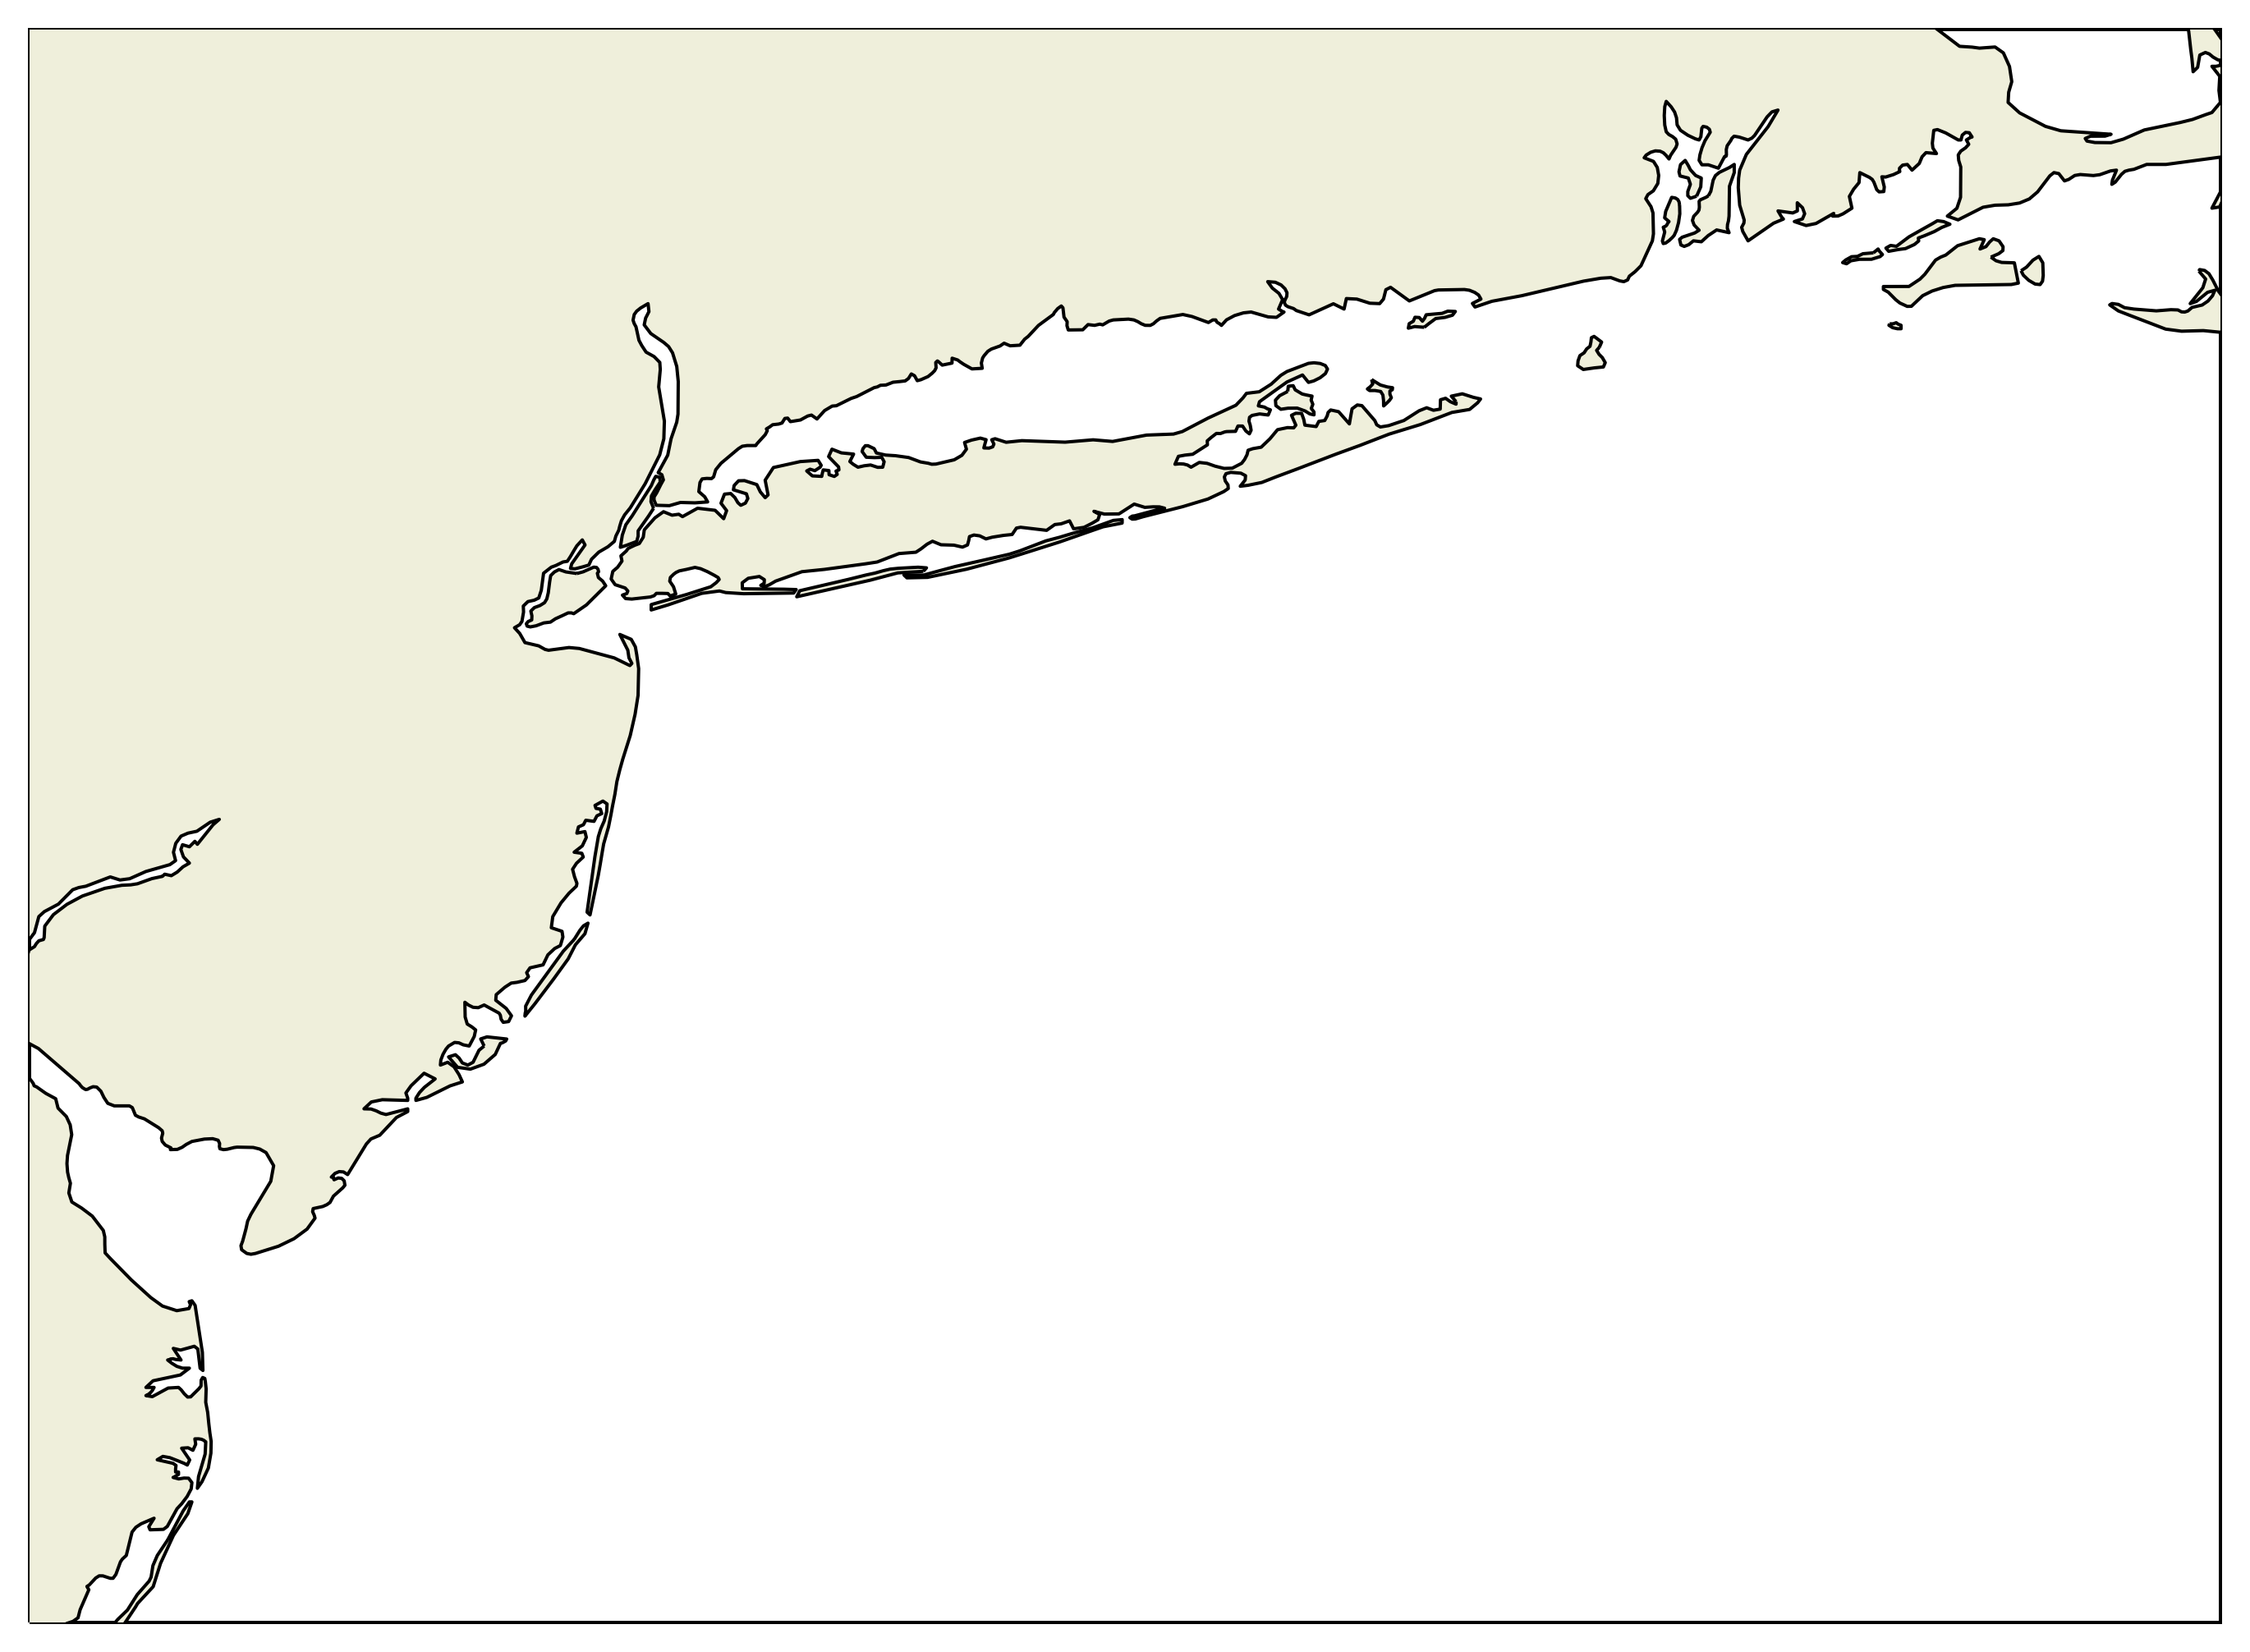

In [21]:
plt.figure(figsize=(15,7), dpi=360)
ax = plt.axes(projection=ccrs.PlateCarree())
ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,sst*np.nan,
                              projection_type='PlateCarree',
                              show_grid_lines=False,
                              user_lon_0=0);
ax.set_extent([-75.5, -70, 38, 42])
plt.savefig('../img/blank-platecaree-nesba.png', transparent=True, bbox_inches='tight')

<sub> Written by Escobar, I on October 2022 </sub>